# MGFD25 Assignment 2: 
## Predicting loan failures

### Please rename the file to Legal First Name_Legal Last Name_Student ID_A2.ipynb

This notebook will first walk you through the steps in data exploration and data cleaning using Pandas.  Then we'll try to predict which customer is going to default on their loans using a machine learning model called Decision Tree.  Before we begin, let's review the analytic process.
The cross-industry standard process for data mining, known as *CRISP-DM*, is an open standard process model that describes common approaches used by data mining experts!
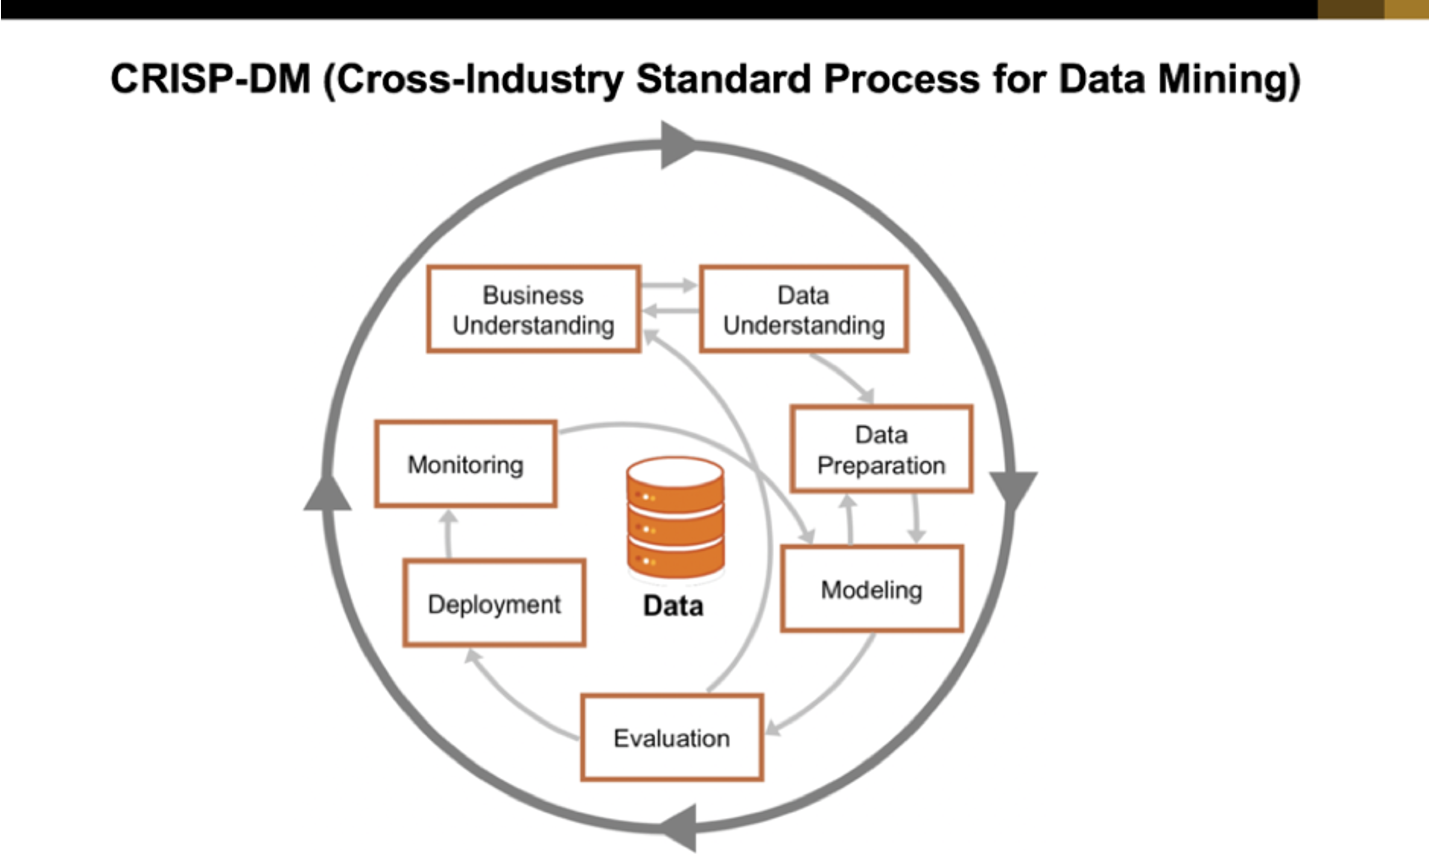
Source: sap.com

The following exercise in Part 1 will focus more on the stages of *Data Exploration* and *Data Preparation*.  These two stages are critical in the building of successful machine learning models.  These two steps are also the most labour intensive and time-consuming stages.  
The dataset is sourced from kaggel.com (https://www.kaggle.com/skihikingkevin/online-p2p-lending).  It combines historical loans from both Prosper and Lending Club from 2013 to 2018.

#### Let's import the data file

In [379]:
# First we will import Panadas and other useful libraries
import os
import numpy as np
import pandas as pd

In [380]:
# Before we read the data file, let's locate the working directory
# adding my own code since default goes to downloads folder

new_directory = "C:\\Users\OWNER\Documents\Fintech\Assignment 2"
os.chdir(new_directory)
os.getcwd()


'C:\\Users\\OWNER\\Documents\\Fintech\\Assignment 2'

In [381]:
cd ~/Documents\Fintech\Assignment 2

C:\Users\OWNER\Documents\Fintech\Assignment 2


In [382]:
# Let's read the data file into a Pandas dataframe
df = pd.read_csv('p2p_loans.csv')

C:\Users\OWNER\AppData\Local\Temp\ipykernel_4444\2229577966.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('p2p_loans.csv')


It looks like there is a problem with column 7.  Let's keep that in mind, and we'll fix that later.  Let's first get familiar with the dataset.

## Data exploration

Data exploration aims to understand what data exists in a dataset, its characteristics, and the relationship between elements of the data.  
Data exploration has the following stages:
1. Variable identification
2. Data structuring
3. Univariate analysis
4. Bivariate analysis
5. Missing value analysis
6. Outlier analysis

### Initial Exploration: Variable identification (6%)
When you are sourcing data, you will often find that the table names and variables names have little meaning.

Without complete metadata, it is challenging to use the data. The alternative is speaking with the owner or creator of the data, but there are obvious concerns.

The purpose of this exercise is to understand the data, their types, and their limitations.  We'll look at each variable and do a philosophical analysis about its meaning and importance for this problem.

In [383]:
# Let's take a look at the first few rows
df.tail()

,loan_number,amount_borrowed,term,borrower_rate,installment,grade,origination_date,listing_title,loan_status_description,data_source
2875141,1081905,10000.0,36,0.0934,319.582092,B,2018-06-29,NaN,CURRENT,Prosper
2875142,1081908,10000.0,36,0.1214,332.812163,C,2018-06-29,NaN,CURRENT,Prosper
2875143,1081947,4000.0,60,0.2455,116.352367,E,2018-06-29,NaN,CURRENT,Prosper
2875144,1081797,30000.0,60,0.1878,774.589469,D,2018-06-29,NaN,CURRENT,Prosper
2875145,1081953,3500.0,36,0.1024,113.329941,B,2018-06-29,NaN,CURRENT,Prosper


In [384]:
df.shape

(2875146, 10)

In [385]:
df.columns

Index(['loan_number', 'amount_borrowed', 'term', 'borrower_rate',
       'installment', 'grade', 'origination_date', 'listing_title',
       'loan_status_description', 'data_source'],
      dtype='object')

In [386]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2875146 entries, 0 to 2875145
Data columns (total 10 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   loan_number              int64  
 1   amount_borrowed          float64
 2   term                     int64  
 3   borrower_rate            float64
 4   installment              float64
 5   grade                    object 
 6   origination_date         object 
 7   listing_title            object 
 8   loan_status_description  object 
 9   data_source              object 
dtypes: float64(3), int64(2), object(5)
memory usage: 219.4+ MB


Luckily, the column names are very intuitive.  Otherwise, you'll need to invest time in searching for the correct data explanation. 
Based on the initial exploration and your understanding of the business, which 3 columns do you think will be the least important to predicting bad loans?  

Please include your answer within the notebook.

The 3 least important columns for predicting bad loans would likely be the following (in no particular order):

1. Loan Number:
Though useful to track which loan belongs to which person, the loan number is simply and identifier for admin or tracking purposes and likely provides no real insight into the person's past financial behaviours for predictive purposes.

2. Origination Date:
This represents when the loan was issued, which might not directly correlate (or less correlation) with the likelihood of a loan going into default. Loan performance is generally assessed based on factors at the time of origination and borrower behavior over the life of the loan, rather than the specific date it was originated.

3. Data Source:
This is where the loan data comes from, and in this case is all from the Lending Club. The predictive "power" of a model would likely rely more on borrower characteristics and loan term/amount/etc rather than where the data or loan comes from.


### Data structuring
Data does not often come formatted for modelling. We sometimes have to transform a long data table into a wide data table and vice versa. Luckily, our dataset here does not require transformation.
Example:
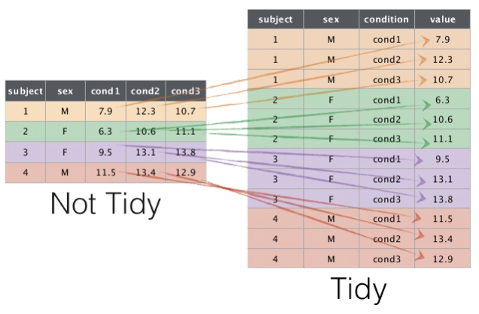

### Univariate Analysis (20%)
Univariate analysis is about understanding each variable individually. These are the statistics you are probably most familiar with: mean, mode, median, max, min, quartiles, standard deviation, and frequency. 
These can be visualized using 
* histograms
* box plots
* line charts for time series variables

We will go through a few columns and review them carefully.

In [387]:
# Let's import some python libraries that can help us analyse 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [388]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2875146 entries, 0 to 2875145
Data columns (total 10 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   loan_number              int64  
 1   amount_borrowed          float64
 2   term                     int64  
 3   borrower_rate            float64
 4   installment              float64
 5   grade                    object 
 6   origination_date         object 
 7   listing_title            object 
 8   loan_status_description  object 
 9   data_source              object 
dtypes: float64(3), int64(2), object(5)
memory usage: 219.4+ MB


Loan numbers are sort of like account numbers, looking at the distriubiton won't provide much value.  Instead we want to see whether there are missing or duplicated values.

In [389]:
df['loan_number'].describe()

count    2.875146e+06
mean     5.076601e+07
std      4.813839e+07
min      5.571600e+04
25%      8.654122e+05
50%      4.516220e+07
75%      9.391978e+07
max      1.360671e+08
Name: loan_number, dtype: float64

In [390]:
# looking for missing values
df['loan_number'].isnull().sum()

0

In [391]:
# looking for duplicates
df['loan_number'].duplicated().sum()

1058

In [392]:
# create a duplicated list for further analysis
dup = df[df['loan_number'].duplicated(keep=False)]

In [393]:
dup.sort_values(by=['loan_number'])

,loan_number,amount_borrowed,term,borrower_rate,installment,grade,origination_date,listing_title,loan_status_description,data_source
889167,288279,20225.0,60,0.0839,413.880000,B,2016-03-01T00:00,credit_card,CURRENT,Lending Club
2201072,288279,25000.0,60,0.1543,600.405944,D,2015-03-17,NaN,COMPLETED,Prosper
197106,300390,12000.0,36,0.0649,367.740000,A,2014-12-01T00:00,debt_consolidation,COMPLETED,Lending Club
2212428,300390,15000.0,36,0.0736,465.629411,A,2015-03-31,NaN,COMPLETED,Prosper
587261,302598,17600.0,60,0.0999,373.870000,B,2015-08-01T00:00,credit_card,CURRENT,Lending Club
...,...,...,...,...,...,...,...,...,...,...
187512,1081779,7050.0,36,0.0790,220.600000,A,2012-01-01T00:00,debt_consolidation,COMPLETED,Lending Club
2875091,1081833,20000.0,36,0.2330,777.325124,E,2018-06-29,NaN,CURRENT,Prosper
187409,1081833,9000.0,36,0.0662,276.340000,A,2012-01-01T00:00,credit_card,COMPLETED,Lending Club
187501,1081977,15000.0,36,0.1527,521.970000,C,2012-01-01T00:00,debt_consolidation,CHARGEOFF,Lending Club


*Is there duplicated loans?  Why is that? Should you be concerned about this and investigate further?*

Next let's look at the amount borrowed.

In [394]:
df['amount_borrowed'].describe()

count    2.875146e+06
mean     1.447258e+04
std      8.763608e+03
min      1.000000e+03
25%      8.000000e+03
50%      1.200000e+04
75%      2.000000e+04
max      4.000000e+04
Name: amount_borrowed, dtype: float64

In [395]:
# Let's import some python libraries that can help us analyse 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [396]:
n = df.shape[0] # length of data since I'm gonna use this a bunch

In [397]:
mu = df['amount_borrowed'].sum() / n

sum_sq_diff = sum_sq_diff = sum((amount - mu) ** 2 for amount in df['amount_borrowed'])
std = (sum_sq_diff / (n - 1)) ** 0.5

print(mu)
print(std)

14472.584424071441
8763.607679792027


C:\Users\OWNER\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


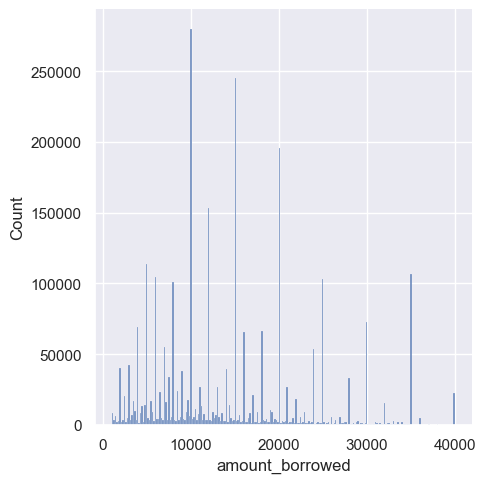

In [398]:
sns.displot(df['amount_borrowed'])

<Axes: xlabel='amount_borrowed'>

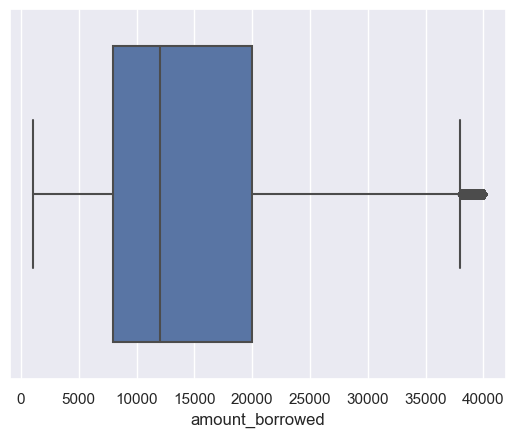

In [399]:
sns.boxplot(x=df['amount_borrowed'])

In [400]:
#skewness and kurtosis
print("Skewness: %f" % df['amount_borrowed'].skew())
print("Kurtosis: %f" % df['amount_borrowed'].kurt())

Skewness: 0.812084
Kurtosis: 0.024130


C:\Users\OWNER\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


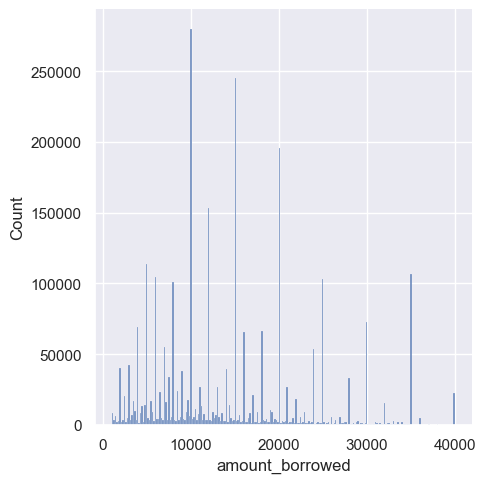

In [472]:
# i added this too
sns.displot(df['amount_borrowed'])

Let us examine a categlorical variable, 'listing_title'

In [401]:
df['listing_title'].describe()

count                2012068
unique                    14
top       debt_consolidation
freq                 1154304
Name: listing_title, dtype: object

[Text(0, 0, 'debt_consolidation'),
 Text(1, 0, 'home_improvement'),
 Text(2, 0, 'credit_card'),
 Text(3, 0, 'other'),
 Text(4, 0, 'major_purchase'),
 Text(5, 0, 'small_business'),
 Text(6, 0, 'house'),
 Text(7, 0, 'moving'),
 Text(8, 0, 'medical'),
 Text(9, 0, 'car'),
 Text(10, 0, 'vacation'),
 Text(11, 0, 'renewable_energy'),
 Text(12, 0, 'wedding'),
 Text(13, 0, 'educational')]

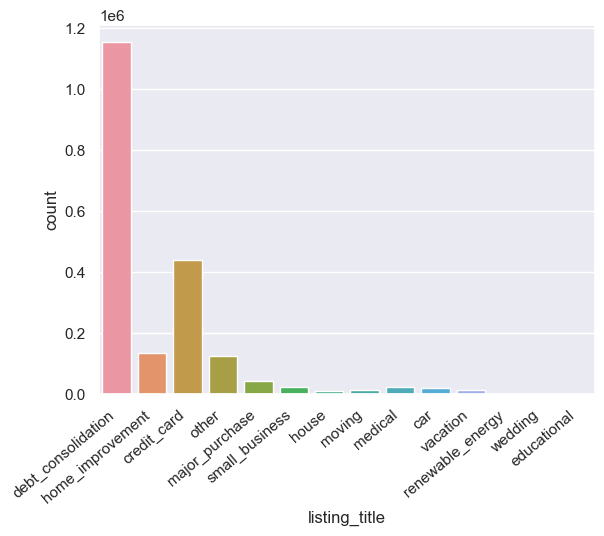

In [402]:
ax = sns.countplot(x=df['listing_title'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

### here's what I added for the other columns

In [403]:
# term
# looking for missing values
df['term'].isnull().sum()

0

In [404]:
# duplicates
df['term'].duplicated().sum()

2875143

[Text(0, 0, '12'), Text(1, 0, '36'), Text(2, 0, '60')]

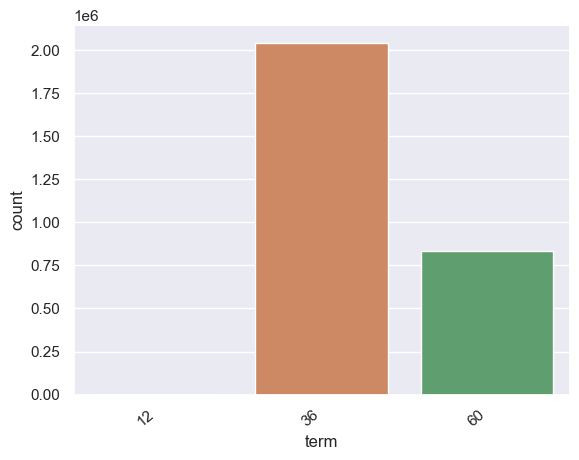

In [405]:
t_ax = sns.countplot(x=df['term'])
t_ax.set_xticklabels(t_ax.get_xticklabels(), rotation=40, ha="right")

In [406]:
df['term'].value_counts()

term
36    2042164
60     832710
12        272
Name: count, dtype: int64

In [407]:
# borrower_rate            
# looking for missing values
df['borrower_rate'].isnull().sum()

0

In [408]:
# duplicates
df['borrower_rate'].duplicated().sum()

2874290

C:\Users\OWNER\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


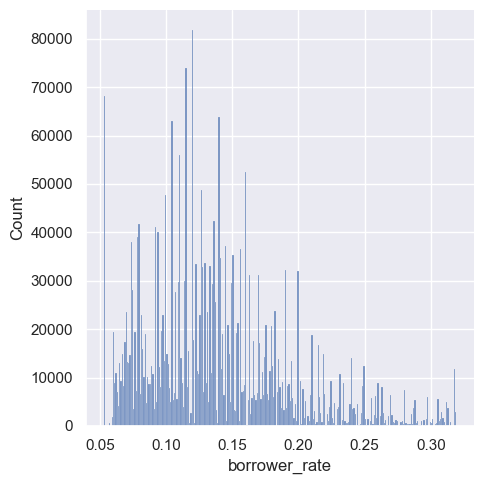

In [409]:
sns.displot(df['borrower_rate'])

In [410]:
#skewness and kurtosis
print("Skewness: %f" % df['borrower_rate'].skew())
print("Kurtosis: %f" % df['borrower_rate'].kurt())

Skewness: 0.924474
Kurtosis: 0.726619


<Axes: xlabel='borrower_rate'>

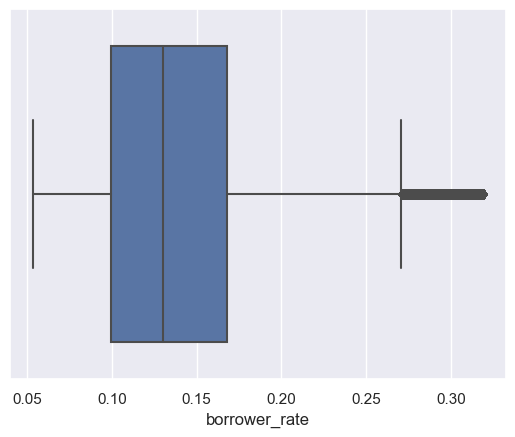

In [411]:
sns.boxplot(x=df['borrower_rate'])

In [412]:
# installment
# looking for missing values
df['installment'].isnull().sum()

0

In [413]:
# duplicates
df['installment'].duplicated().sum()

2717836

C:\Users\OWNER\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


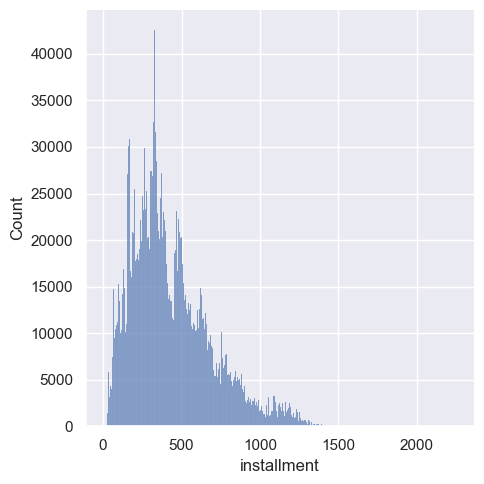

In [414]:
sns.displot(df['installment'])

In [415]:
#skewness and kurtosis
print("Skewness: %f" % df['installment'].skew())
print("Kurtosis: %f" % df['installment'].kurt())

Skewness: 1.019533
Kurtosis: 0.841710


<Axes: xlabel='installment'>

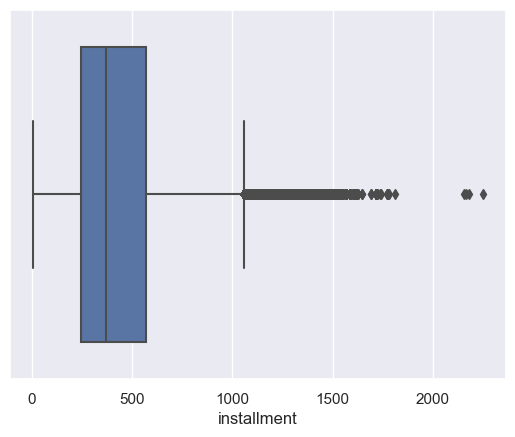

In [416]:
sns.boxplot(x=df['installment'])

In [417]:
# grade
# looking for missing values
df['grade'].isnull().sum()

0

In [418]:
# duplicates
df['grade'].duplicated().sum()

2875139

[Text(0, 0, 'B'),
 Text(1, 0, 'A'),
 Text(2, 0, 'E'),
 Text(3, 0, 'C'),
 Text(4, 0, 'D'),
 Text(5, 0, 'F'),
 Text(6, 0, 'G')]

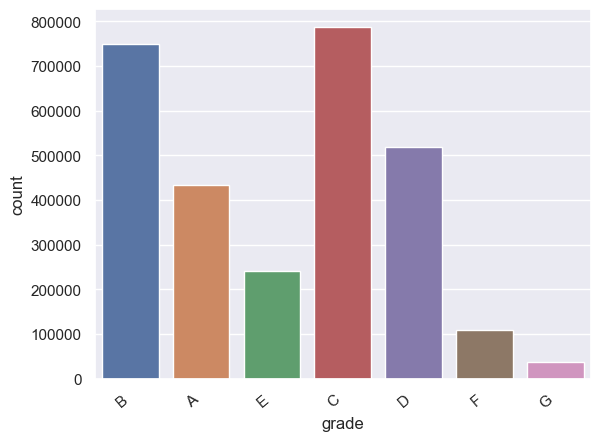

In [419]:
g_ax = sns.countplot(x=df['grade'])
g_ax.set_xticklabels(g_ax.get_xticklabels(), rotation=40, ha="right")

In [420]:
# origination_date
# looking for missing values
df['origination_date'].isnull().sum()

0

In [421]:
# duplicates
df['origination_date'].duplicated().sum()

2873687

In [422]:
# loan_status_description 
# looking for missing values
df['loan_status_description'].isnull().sum()

0

In [423]:
# duplicates
df['loan_status_description'].duplicated().sum()

2875141

[Text(0, 0, 'COMPLETED'),
 Text(1, 0, 'CHARGEOFF'),
 Text(2, 0, 'CURRENT'),
 Text(3, 0, 'DEFAULTED'),
 Text(4, 0, 'CANCELLED')]

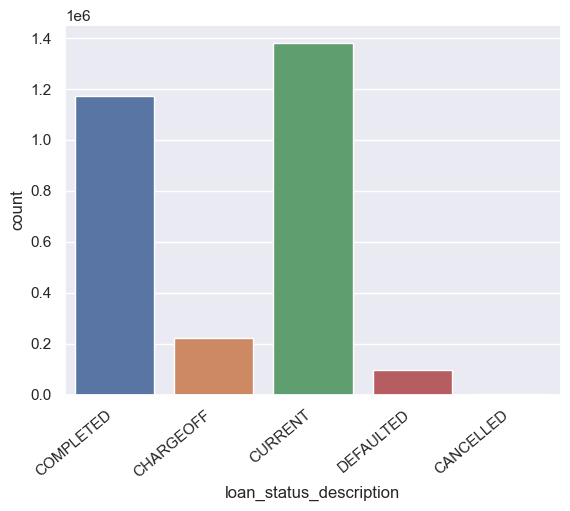

In [424]:
l_ax = sns.countplot(x=df['loan_status_description'])
l_ax.set_xticklabels(l_ax.get_xticklabels(), rotation=40, ha="right")

In [425]:
df['loan_status_description'].value_counts()

loan_status_description
CURRENT      1381520
COMPLETED    1173162
CHARGEOFF     222867
DEFAULTED      95344
CANCELLED       2253
Name: count, dtype: int64

In [426]:
defaulted = df[df['loan_status_description'] == 'DEFAULTED'].shape[0]
chargeoff = df[df['loan_status_description'] == 'CHARGEOFF'].shape[0]

pct_bad1 = (defaulted + chargeoff)/n
pct_bad1

0.1106764665168308

In [427]:
completed = df[df['loan_status_description'] == 'COMPLETED'].shape[0]

pct_bad2 = (defaulted + chargeoff) / (defaulted + chargeoff + completed)
pct_bad2

0.21336781609966118

In [428]:
# data_source
# looking for missing values
df['data_source'].isnull().sum()

0

In [429]:
# duplicates
df['data_source'].duplicated().sum()

2875144

I only went over 3 of 9 features here.  You will repeat the above steps to get familiar with the rest of the features and the target.
Here are some questions that you'll ask when you are going through each column:
* Are there missing or duplicated data?
* How is the data distributed? Are there any interesting patterns?
* Are there data outliers?
* Is the data balanced?

List out 5 observations that you think are interesting.  I will accept point-form.
You will then try to address these questions later in the 'Data Preparation' stage.

First I repeated some of the given tests/code for the other columns above

For most of the categories, I would not be concerned with duplicates because of course some people are going to have the same grade, have the same conditions on their loans (installment/term/rate/description/status)

I didn't bother with distribution for the categorical variables since things like loan number and data source won't provide any useful distribution

The distribution of installment and borrower rate are both chi-square/normal which is like totally typical in my mind (maybe doesn't qualify as observations that are "interesting"). Since it seems common for there to be average levels of installments/rates that people will qualify for and fewer people will qualify for something above/below this average. Same with the grade box-plot. If put alphabetically then it also becomes a chi-sq/normal which appropriately lines up with the installment/borrower distribution. I would expect to see high correlation between these.

Some observations that I think would be interesting when trying to predict future bad debt are:

1 . the outliers in the borrower rate and installment would be something to look out for, if the outliers associate with the lower grades or with the outliers in the other box plots. 

2 . sample bad debt data is 11% -> how representative will this be going forward? maybe this should only be taken as a percent of the completed loans instead of all the loans, to apply to the current loans? (then it increases to 21.3% bad debt). How much of this % is attributed to the outliers?

3 . installment seems to have the most outliers (points outside of the box plot). Should all of these be gotten rid of to make the data more balance? or just the most extreme? 

4 . With the loan number duplicate observation, I would be concerned if there are multiple loans going out at the same time from the same data source. If loans are concurrent should they be included in the prediction data? or is this some mistake by the Lending Club that should be cracked down on?

5 . Amount borrowed is kind of normal, but not as convincingly as installment or borrower rate. It also has a huge chunk of outliers just outside the box plot bounds. Maybe if some or all of those were removed then the distribution would become more smooth, or the data would appear more balanced.


### Bivariate Analysis (9%)
The bivariate analysis begins to look at variables in pairs. The most common bivariate analysis is 'correlation', which can be visualized using a heatmap or a scatterplot.

A regression with only two variables produces the line of best fit you are used to seeing in Excel, and the correlation coefficient!

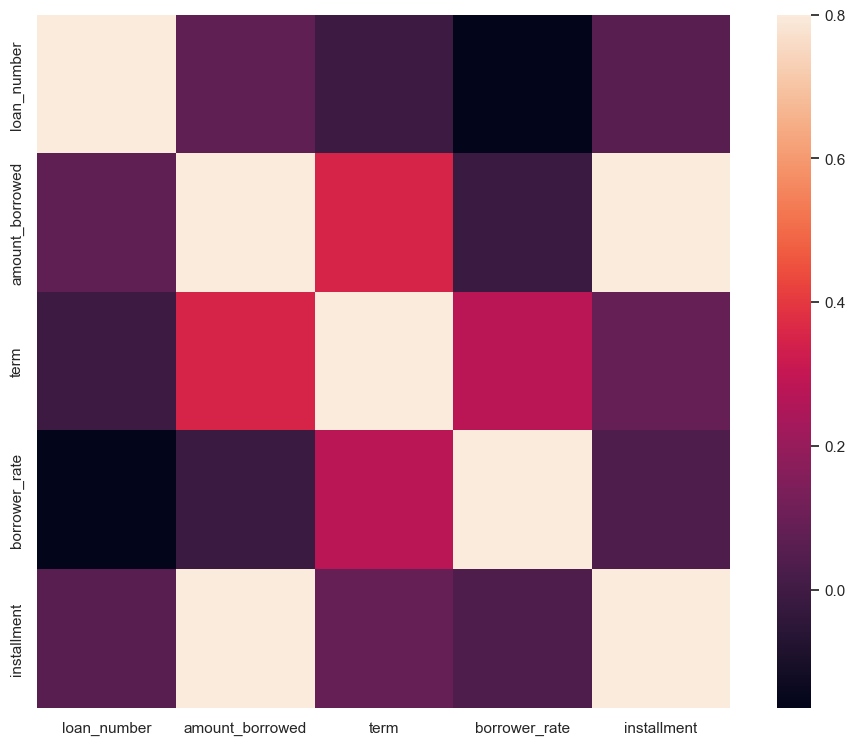

In [430]:
#correlation matrix

corrmat = df.corr(numeric_only=True)
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

C:\Users\OWNER\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


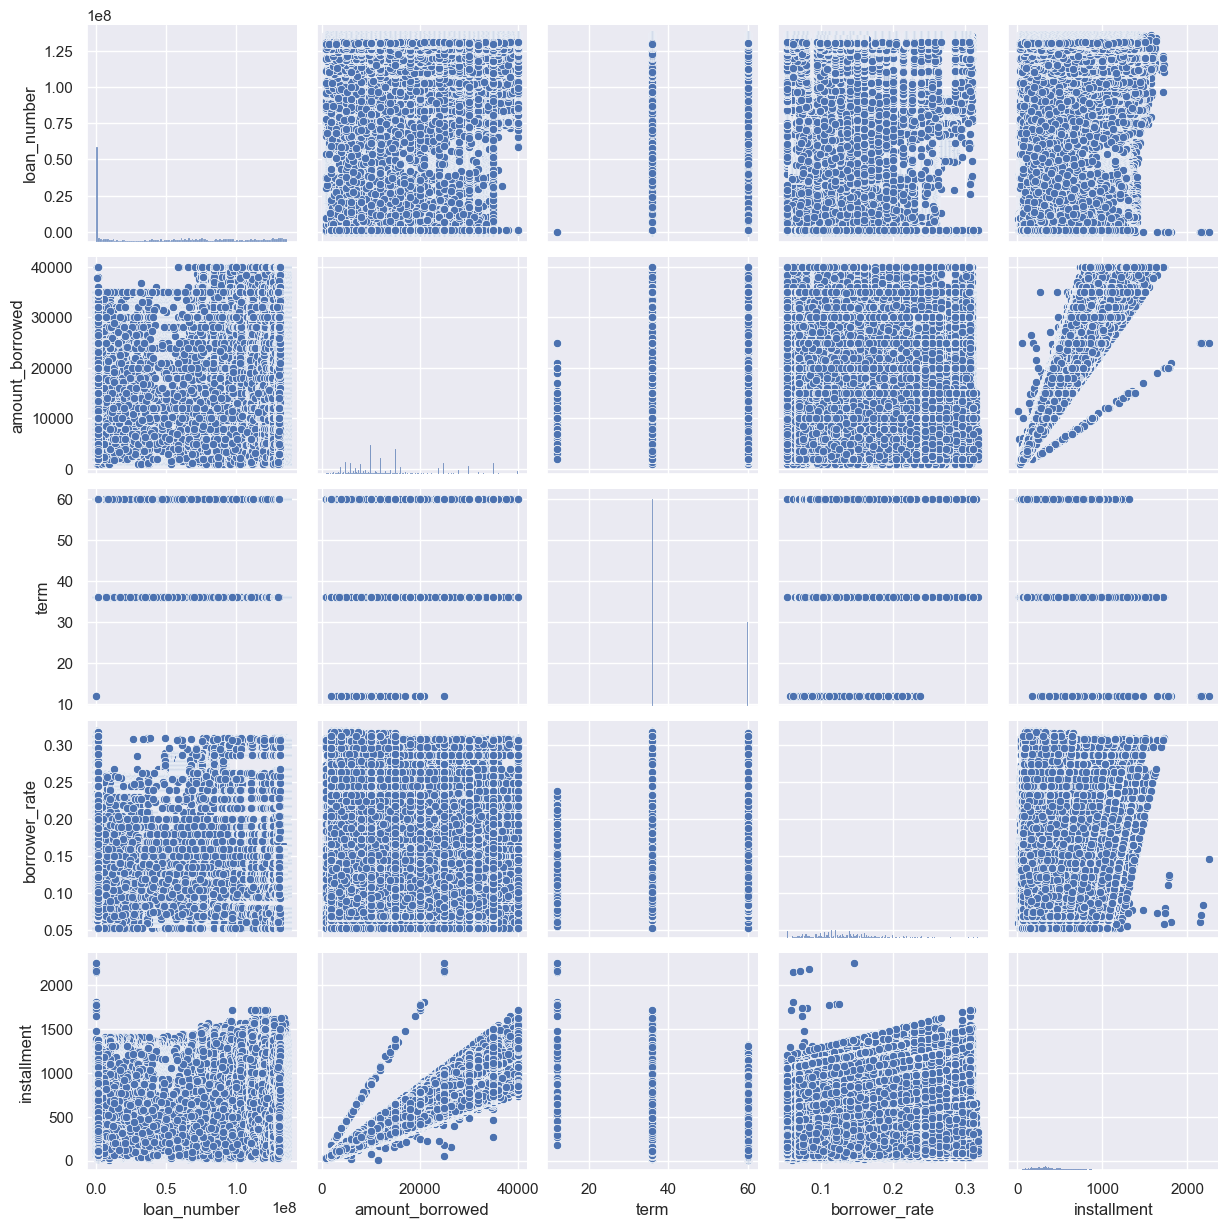

In [431]:
#scatterplot
sns.set()
cols = ['loan_number', 'amount_borrowed', 'term', 'borrower_rate',
       'installment', 'grade', 'origination_date', 'listing_title',
       'loan_status_description', 'data_source']
sns.pairplot(df[cols])
plt.show();

By looking at the heatmap and the scatterplot above, what conclusion can you draw?  Are there any high/low correlations that jump out?  Do they make sense?
We will incorporate this thinking into our next stage in 'Feature selection'.
*Note* that only continuous variables are shown.  We can also incorporate categorical variables into the scatter plot, but we'll have to do some data transformation.  We will do that in the Data cleaning part, and you may re-run the scatter plot after the transformation.

##### High correlations:
1 . Installment and amount borrowed

The highest correlation at a 1 or just about in the heat map, and it is positive correlation shown in the scatterplots. This definitely makes sense, since the 

I don't see it in the correlation plots above (because only looking at conitnuous), but I would also expect grade to have a high correlation with borrower rate and installment (and looking back now I do see a high correlation between the two in the second chunk of scatters near the bottom)

##### Medium correlation:
1 . borrower_rate and installment

the positive correlation makes sense because I would expect larger principal repayments to be deemed riskier thus have a higher rate attached, or if the borrower rate is higher then the installment should be expected to be higher as the interest part of the installment increases.

2 . installment and term

We can see this is a negative correlation from the scatterplots, which again makes sense. If I owe X, the installment would be smaller as the amount of installments (term) goes up, since it is divided by a higher number. X/n -> 0 as n increases

3 . amount borrowed and term
Borrowers often seek longer loan terms when they need to borrow larger amounts of money, this can make a larger loan more affordable as it is spread out over longer terms. Positive correlation makes sense.

##### Low correlations:
1 . Amount borrowed and borrower rate 

I thought this would have a higher positive correlation so this sticks out to me a little. I would initially think that higher amounts borrowed should be deemed riskier and thus have a higher rate attached to them.

2 . loan number and installment
3 . loan number and amount borrowed
4 . loan number and term

the loan number correlations surprise me a bit, but I can easily convince myself it makes sense, as you may want to identify some characteristics of the loan with the number for operating system purposes. I don't really think this correlation is important as of yet, and if it is, then it's good that its very low so even if I mess up by ignoring it it shouldn't have as much pull as if I ignored a higher correlation

##### No correlations:
1 . loan number and borrower rate

This I mean this is as I expected as I initially thought loan number is just an identifier.

##### Overall

I think it's good that nothing sticks out significantly, all the correlation behaviour is more or less how I would expect it to be. For those with high-medium correlation, I think the outliers in these areas should be addressed in case they are causing the correlation to be pulled too much one way or another.


## Data Preparation (15%)

This is the part where we make changes to the dataset so that it can feed nicely into the Machine Learning Models.
Data cleaning usually involves at least one of the below processes:
Dealing with inconsistent recording
* Removing unwanted observations
* Removing duplicates
* Investigating outliers
* Dealing with missing items


### Cleaning up the date columns

Remember there was a warning message when we import the file?  Dates should be imported into the dataframe as data type 'datetime' instead of 'object'.  Let's clean up this dataset by transforming all dates to 'datetime' format.

In [432]:
# Idk why this gets an error it was part of the given code but it doesn't affect anything below i don't think
df['origination_date'] = pd.to_datetime(df['origination_date'])

ValueError: time data "2013-01-04" doesn't match format "%Y-%m-%dT%H:%M", at position 78. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [433]:
# Now check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2875146 entries, 0 to 2875145
Data columns (total 10 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   loan_number              int64  
 1   amount_borrowed          float64
 2   term                     int64  
 3   borrower_rate            float64
 4   installment              float64
 5   grade                    object 
 6   origination_date         object 
 7   listing_title            object 
 8   loan_status_description  object 
 9   data_source              object 
dtypes: float64(3), int64(2), object(5)
memory usage: 219.4+ MB


### Handling Missing Data
There are a few options in dealing with missing data.  We could simply drop the row, given the dataset is large enough. Otherwise, you can consider some form of data imputation to address the problem:
* Mean substitution
* Regression with multiple imputation
* Full information maximum likelihood

There are Python packages that can assist you with data imputation, but we will not get into that.

In [435]:
df.isnull().sum()

loan_number                     0
amount_borrowed                 0
term                            0
borrower_rate                   0
installment                     0
grade                           0
origination_date                0
listing_title              863078
loan_status_description         0
data_source                     0
dtype: int64

All the missing data comes from 'listing_title'.  What will you do?  Should you replace missing value with something like 'unknown'? or do you remove these rows?

In [436]:
# We will replace all the 'NaN's in the column 'listing_title'
df['listing_title'] = df['listing_title'].fillna('unknown')

In [437]:
df['listing_title'].value_counts()

listing_title
debt_consolidation    1154304
unknown                863078
credit_card            441191
home_improvement       136263
other                  124427
major_purchase          44442
medical                 24808
small_business          22834
car                     21261
vacation                13992
moving                  13336
house                   12099
wedding                  1850
renewable_energy         1259
educational                 2
Name: count, dtype: int64

### Keeping only useful rows

In [438]:
# Let us examine the target column "loan_status_description"
df['loan_status_description'].value_counts()

loan_status_description
CURRENT      1381520
COMPLETED    1173162
CHARGEOFF     222867
DEFAULTED      95344
CANCELLED       2253
Name: count, dtype: int64

If we only want the Machine Learning model to predict whether a loan will be 'completed' or 'defaulted', the other status in our target column may be removed or recategorized.

What do you think is the best course of action?


In [439]:
df_filtered = df.loc[df['loan_status_description'].isin(['COMPLETED','DEFAULTED'])]

In [440]:
df_filtered['loan_status_description'].value_counts()

loan_status_description
COMPLETED    1173162
DEFAULTED      95344
Name: count, dtype: int64

Number of default loan is only ~8% of all records.  This is a 'imbalanced' dataset.

In [441]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1268506 entries, 0 to 2875079
Data columns (total 10 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   loan_number              1268506 non-null  int64  
 1   amount_borrowed          1268506 non-null  float64
 2   term                     1268506 non-null  int64  
 3   borrower_rate            1268506 non-null  float64
 4   installment              1268506 non-null  float64
 5   grade                    1268506 non-null  object 
 6   origination_date         1268506 non-null  object 
 7   listing_title            1268506 non-null  object 
 8   loan_status_description  1268506 non-null  object 
 9   data_source              1268506 non-null  object 
dtypes: float64(3), int64(2), object(5)
memory usage: 106.5+ MB


### Removing features that may not be useful

Decision Tree is one of the most widely-used ML algorithms.  It can handle both continuous and categorical data.  However, it cannot process 'datetime', unless we transform 'datetime' into a numerical value like age, or categrical value like seasons or year.  For my example here, I will remove the 'origination_dates' to keep things simple.  You may play with some feature engineering if you wish to see whether that can improve the model.  
We also need to convert categorical variables into numerical 'levels'.  The codes are provided for you below:



##### here's where I start messing around with the df_filtered for model input

In [442]:
# i want to include charge off in the bad debts filtered data frame
df_filtered = df.loc[df['loan_status_description'].isin(['COMPLETED','DEFAULTED', 'CHARGEOFF'])]

In [443]:
df_filtered['loan_status_description'].value_counts()

loan_status_description
COMPLETED    1173162
CHARGEOFF     222867
DEFAULTED      95344
Name: count, dtype: int64

now the bad debt can be shown on a calculator using the values above to be approx 21.337%

In [444]:
# or just how i did it in the previous section
pct_bad2

0.21336781609966118

In [445]:
# We will remove the datetime columns and other irrelavent columns
df_filtered = df_filtered.drop(columns=['origination_date', 'data_source'])

In [446]:
df_filtered['listing_title'].value_counts()

listing_title
debt_consolidation    595511
unknown               487360
credit_card           218391
home_improvement       63750
other                  54010
major_purchase         20235
medical                10944
small_business         10909
car                    10001
moving                  6723
vacation                6511
house                   4924
wedding                 1459
renewable_energy         644
educational                1
Name: count, dtype: int64

In [447]:
df_filtered['listing_title'] = df_filtered['listing_title'].fillna('unknown') 
# use same method as above to deal with NaN value

In [448]:
df_filtered

,loan_number,amount_borrowed,term,borrower_rate,installment,grade,listing_title,loan_status_description
0,10149342,27050.0,36,0.1099,885.460000,B,debt_consolidation,COMPLETED
1,10149488,4800.0,36,0.1099,157.130000,B,home_improvement,COMPLETED
2,10148122,12000.0,36,0.0762,373.940000,A,debt_consolidation,COMPLETED
3,10119623,12000.0,36,0.1199,398.520000,B,debt_consolidation,COMPLETED
4,10159498,12000.0,36,0.0662,368.450000,A,debt_consolidation,COMPLETED
...,...,...,...,...,...,...,...,...
2874654,1080060,20000.0,36,0.0839,630.331835,B,unknown,COMPLETED
2874846,1073951,6000.0,36,0.0894,190.630891,B,unknown,COMPLETED
2874929,1073195,6000.0,36,0.2784,247.663171,F,unknown,COMPLETED
2875013,1081659,15000.0,36,0.2644,607.880629,E,unknown,COMPLETED


In [449]:
# dealing with duplicates
df_filtered['loan_number'].duplicated().sum()

250

In [450]:
dup_filtered = df_filtered[df_filtered['loan_number'].duplicated(keep=False)]
dup_filtered.sort_values(by=['loan_number'])

,loan_number,amount_borrowed,term,borrower_rate,installment,grade,listing_title,loan_status_description
2212428,300390,15000.0,36,0.0736,465.629411,A,unknown,COMPLETED
197106,300390,12000.0,36,0.0649,367.740000,A,debt_consolidation,COMPLETED
747686,346692,2200.0,36,0.1153,72.580000,B,educational,COMPLETED
2250814,346692,7000.0,36,0.2161,265.922929,E,unknown,COMPLETED
841469,347282,10950.0,60,0.2599,327.790000,G,debt_consolidation,COMPLETED
...,...,...,...,...,...,...,...,...
2869381,1079976,5000.0,36,0.3182,217.272730,G,unknown,COMPLETED
187571,1080636,16200.0,36,0.1171,535.840000,B,credit_card,COMPLETED
2873861,1080636,7500.0,36,0.3182,325.909096,G,unknown,COMPLETED
2869880,1081434,15000.0,36,0.3119,646.589743,F,unknown,COMPLETED


since we have dropped the "current" status description, we know that all these loan statuses are in the past
so the duplicates don't have the possibility of being active at the same time which was a concern from the
observations above. Therefore I would not consider these duplicates to be errors or something that needs fixing.

For installments, from the univariate analysis, there were outliers starting at > 1100, but a few really significant outliers where the installment was > 2000. Perhaps these can be removed.

In [451]:
df_filtered = df_filtered.drop(df_filtered[df_filtered['installment'] > 2000].index)
# remove outliers

In [452]:
df_filtered

,loan_number,amount_borrowed,term,borrower_rate,installment,grade,listing_title,loan_status_description
0,10149342,27050.0,36,0.1099,885.460000,B,debt_consolidation,COMPLETED
1,10149488,4800.0,36,0.1099,157.130000,B,home_improvement,COMPLETED
2,10148122,12000.0,36,0.0762,373.940000,A,debt_consolidation,COMPLETED
3,10119623,12000.0,36,0.1199,398.520000,B,debt_consolidation,COMPLETED
4,10159498,12000.0,36,0.0662,368.450000,A,debt_consolidation,COMPLETED
...,...,...,...,...,...,...,...,...
2874654,1080060,20000.0,36,0.0839,630.331835,B,unknown,COMPLETED
2874846,1073951,6000.0,36,0.0894,190.630891,B,unknown,COMPLETED
2874929,1073195,6000.0,36,0.2784,247.663171,F,unknown,COMPLETED
2875013,1081659,15000.0,36,0.2644,607.880629,E,unknown,COMPLETED


four rows were dropped that's fine considering the large enough sample we have

From the univariate box plot of amount borrowed, the outliers were at > 38k about.
To make the outliers more significant, let's make the cutoff at 40k

In [453]:
df_filtered = df_filtered.drop(df_filtered[df_filtered['amount_borrowed'] > 40000].index)

borrower rate outliers at approx > 0.27.
again to really target the more significant outliers, let's use 0.3

In [454]:
df_filtered = df_filtered.drop(df_filtered[df_filtered['borrower_rate'] > 0.3].index)

In [455]:
df_filtered

,loan_number,amount_borrowed,term,borrower_rate,installment,grade,listing_title,loan_status_description
0,10149342,27050.0,36,0.1099,885.460000,B,debt_consolidation,COMPLETED
1,10149488,4800.0,36,0.1099,157.130000,B,home_improvement,COMPLETED
2,10148122,12000.0,36,0.0762,373.940000,A,debt_consolidation,COMPLETED
3,10119623,12000.0,36,0.1199,398.520000,B,debt_consolidation,COMPLETED
4,10159498,12000.0,36,0.0662,368.450000,A,debt_consolidation,COMPLETED
...,...,...,...,...,...,...,...,...
2874654,1080060,20000.0,36,0.0839,630.331835,B,unknown,COMPLETED
2874846,1073951,6000.0,36,0.0894,190.630891,B,unknown,COMPLETED
2874929,1073195,6000.0,36,0.2784,247.663171,F,unknown,COMPLETED
2875013,1081659,15000.0,36,0.2644,607.880629,E,unknown,COMPLETED


Now we've dropped 16,251 more rows.
This "unclean" data was only 1.09% of our original df_filtered which in my mind is a reasonable amount. 
We still have a very good sized sample to use to predict bad debt.

In [456]:
# checking for string values
df_filtered['term']
# this data seems to be "clean" in integer value already, no need to remove any strings at the end

0          36
1          36
2          36
3          36
4          36
           ..
2874654    36
2874846    36
2874929    36
2875013    36
2875079    36
Name: term, Length: 1475118, dtype: int64

Walk me through what you’ve done to prepare your dataset for the next step.  There is no right or wrong answer here.  Your grade will be based on the reasons for such action and the clarity of communication.




Term already seems to return an integer value ie 36 not 36 months, so this doesn't seem to need to be cleaned up before inputting into the model. Otherwise I would use something like 
df['term'] = df['term'].str.replace(' months', '')

Since charge-offs are when the lender has written off the loan as a loss which is also an unideal outcome for a lender, I wanted to include those as bad debt along with defaulted, so I changed df_filtered accordingly. I would think a charge-off is as bad (or worse than) a loan in default because the lender has formally given up hope of being repaid.

There are almost 500,000 out of our (about) 1,500,000 sample where listing title is listed NaN. So that seems like too many to remove, since it takes away almost half our sample, so I would agree with how the code above switched them to unknown (in df), in order to keep the numerical data and potential default info as part of the sample (in df_filtered).

The duplicates of loan numbers I've deemed insignificant for reasons above.

I've removed what I believed were the biggest outliers (determined from the univariate box plots), for borrower rates, installments, and amount borrowed. Again, more notes are above in the markdown boxes around where I did the coding.
Removing these outliers should improve the accuracy/reliability of predictive model because it reduces the influence of extreme values that may skew predictions going forward.

I would transform the grades into 0,1,2,3,4,5 and assign numbers to the other categorical variables like the question suggests but it seems like that's been done for me in the box below

### Data transformation

In [457]:
# Decision tree cannot process categorical variables that are strings(objects).  
# We need to transform them into numerical levels using a library called LabelEncoder.
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df_filtered['grade'] = labelencoder.fit_transform(df_filtered['grade'])
df_filtered['listing_title'] = labelencoder.fit_transform(df_filtered['listing_title'])
# 0 = good, 1 = default
df_filtered['loan_status_description'] = labelencoder.fit_transform(df_filtered['loan_status_description'])

In [458]:
# Let check the transformation
df_filtered.head()

,loan_number,amount_borrowed,term,borrower_rate,installment,grade,listing_title,loan_status_description
0,10149342,27050.0,36,0.1099,885.46,1,2,1
1,10149488,4800.0,36,0.1099,157.13,1,4,1
2,10148122,12000.0,36,0.0762,373.94,0,2,1
3,10119623,12000.0,36,0.1199,398.52,1,2,1
4,10159498,12000.0,36,0.0662,368.45,0,2,1


C:\Users\OWNER\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


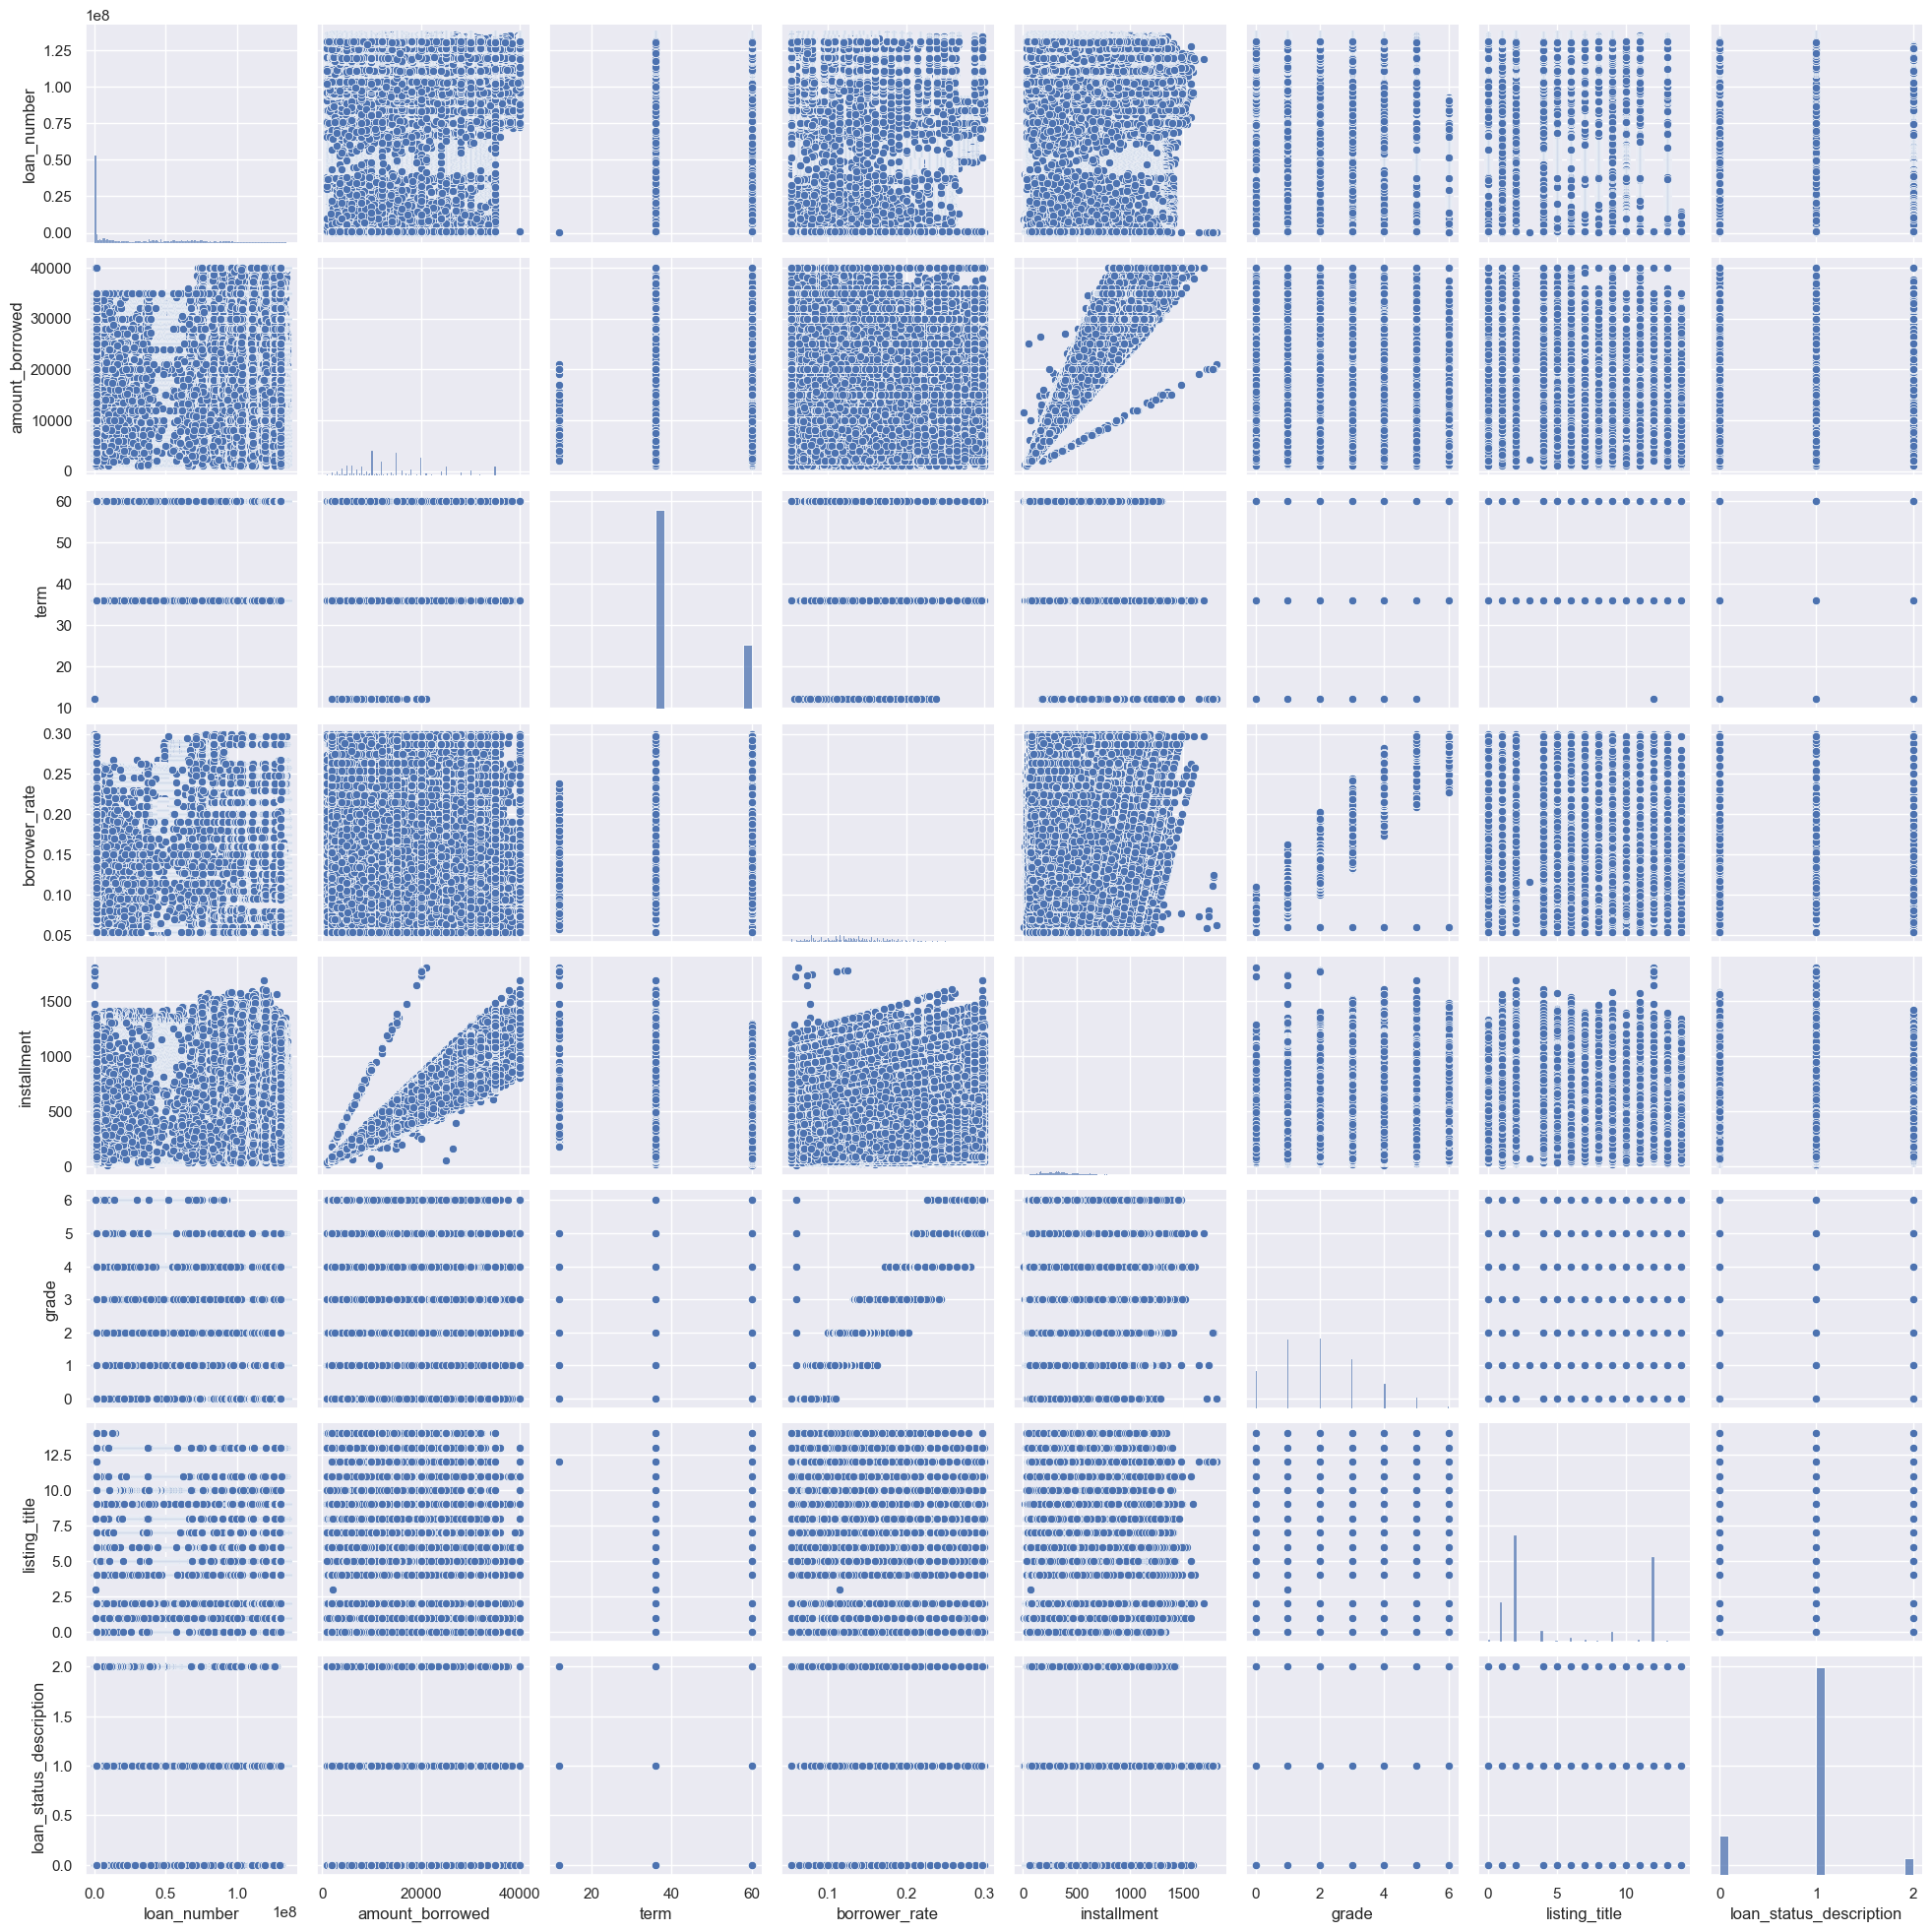

In [459]:
# Now let's try the scatterplot again.  We can see the categorical variables showing now.
sns.set()
cols = ['loan_number', 'amount_borrowed', 'term', 'borrower_rate',
       'installment', 'grade', 'listing_title',
       'loan_status_description']
sns.pairplot(df_filtered[cols])
plt.show();

## Splitting data into training data and test data

'loan_status_description' will be our 'target' for the Machine Learning model to learn from and predict.
Before we feed the clean dataset into the model, we will split the dataset into training data and testing data.  The ML model will train on the training dataset and we will observe the model accuracy by feeding test data into the model for predicted targets.

In general, we will split the dataset 70/30.  70% of data will be used as training data and 30% for testing.  

Because most bankruptcy/bad debt data is imbalanced, i.e only a small percentage of data is bankrupt.  We need to make sure that both the training and testing dataset has the same proportion of bankruptcy.
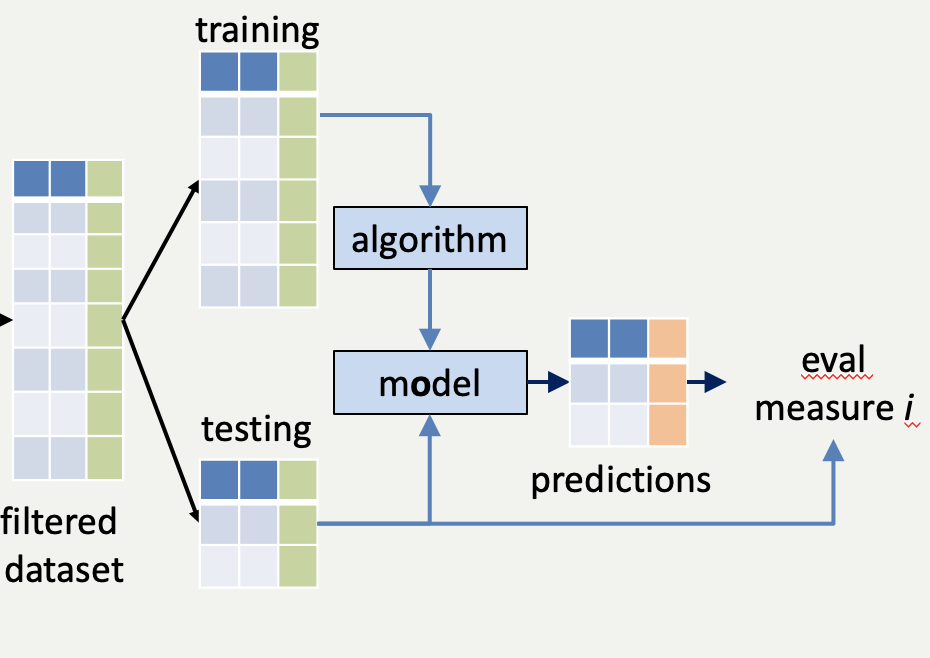

In [460]:
# import the libraries that help us split the dataset
from sklearn.model_selection import train_test_split

In [461]:
# After you drop columms, make sure the column index matches
x, y = df_filtered.iloc[:, 0:6], df_filtered.iloc[:,7]

In [462]:
df_filtered.head()

,loan_number,amount_borrowed,term,borrower_rate,installment,grade,listing_title,loan_status_description
0,10149342,27050.0,36,0.1099,885.46,1,2,1
1,10149488,4800.0,36,0.1099,157.13,1,4,1
2,10148122,12000.0,36,0.0762,373.94,0,2,1
3,10119623,12000.0,36,0.1199,398.52,1,2,1
4,10159498,12000.0,36,0.0662,368.45,0,2,1


In [463]:
# We will do a 70/30 split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y, shuffle=True)

In [464]:
# 0=completed, 1=defaulted
y_test.value_counts()

loan_status_description
1    348987
0     66134
2     27415
Name: count, dtype: int64

In [465]:
y_train.value_counts()

loan_status_description
1    814300
0    154314
2     63968
Name: count, dtype: int64

In [466]:
x_train.head()

,loan_number,amount_borrowed,term,borrower_rate,installment,grade
1134710,85952048,8000.0,36,0.1149,263.780000,1
121550,3376528,15000.0,36,0.0890,476.300000,0
2611124,759852,20000.0,60,0.2399,575.243235,4
1920501,132144305,23000.0,36,0.1358,781.410000,2
582896,58572729,2000.0,36,0.0917,63.760000,1


In [467]:
# import ML libraries
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion='entropy',random_state=42)

# Train Decision Tree Classifer
clf = clf.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [468]:
#Predict the response for test dataset
y_pred = clf.predict(x_test)

## Evaluation
### Model performance

In [469]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

tp = float(cm[1][1])
tn = float(cm[0][0])
fp = float(cm[0][1])
fn = float(cm[1][0])

print(cm)

[[ 17575  47235   1324]
 [ 48639 280406  19942]
 [  1423  19269   6723]]


In [471]:
# Sensitivity: the ability of a test to correctly identify loans that will default.
sensitivity = tp/(tp+fn)

# Specificity: the ability of a test to correctly identify loans that will complete(Without default).
specificity = tn/(tn+fp)

print(sensitivity)
print(specificity)

0.8521813125864244
0.27117728745563957
